<a href="https://colab.research.google.com/github/RifatMuhtasim/Data_Science/blob/main/Feature_Engineering/Transform_Skewed_Columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:

from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df['classification'] = iris.target
df['regression'] = (df['sepal length (cm)'] * df['sepal width (cm)']) + (df['petal length (cm)'] * df['petal width (cm)'])

df0 = df.copy()
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification,regression
0,5.1,3.5,1.4,0.2,0,18.13
1,4.9,3.0,1.4,0.2,0,14.98
2,4.7,3.2,1.3,0.2,0,15.30
3,4.6,3.1,1.5,0.2,0,14.56
4,5.0,3.6,1.4,0.2,0,18.28


In [ ]:
def Polynomial_features(df, target):
    result_df = df.copy()
    column_list = [col for col in df.columns]
    column_list.remove(target)

    for i in column_list:
        result_df[i + '_square'] = df[i] ** 2
        result_df[i + '_cube'] = df[i] ** 3
        result_df[i + '_sqrt'] = np.sqrt(df[i])
        result_df[i + '_log'] = np.log(df[i])
    return result_df

In [ ]:
my_df = Polynomial_features(df = df, target="classification")
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification,regression,sepal length (cm)_square,sepal length (cm)_cube,sepal length (cm)_sqrt,sepal length (cm)_log,sepal width (cm)_square,sepal width (cm)_cube,sepal width (cm)_sqrt,sepal width (cm)_log,petal length (cm)_square,petal length (cm)_cube,petal length (cm)_sqrt,petal length (cm)_log,petal width (cm)_square,petal width (cm)_cube,petal width (cm)_sqrt,petal width (cm)_log,regression_square,regression_cube,regression_sqrt,regression_log
0,5.1,3.5,1.4,0.2,0,18.13,26.01,132.651,2.258318,1.629241,12.25,42.875,1.870829,1.252763,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,328.6969,5959.274797,4.257934,2.897568
1,4.9,3.0,1.4,0.2,0,14.98,24.01,117.649,2.213594,1.589235,9.00,27.000,1.732051,1.098612,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,224.4004,3361.517992,3.870400,2.706716
2,4.7,3.2,1.3,0.2,0,15.30,22.09,103.823,2.167948,1.547563,10.24,32.768,1.788854,1.163151,1.69,2.197,1.140175,0.262364,0.04,0.008,0.447214,-1.609438,234.0900,3581.577000,3.911521,2.727853
3,4.6,3.1,1.5,0.2,0,14.56,21.16,97.336,2.144761,1.526056,9.61,29.791,1.760682,1.131402,2.25,3.375,1.224745,0.405465,0.04,0.008,0.447214,-1.609438,211.9936,3086.626816,3.815757,2.678278
4,5.0,3.6,1.4,0.2,0,18.28,25.00,125.000,2.236068,1.609438,12.96,46.656,1.897367,1.280934,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,334.1584,6108.415552,4.275512,2.905808


# Transform Skewed Columns

In [ ]:
import scipy.stats as stat
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
import pylab


def QQPlot(df, x):
    sm.qqplot(df[x], line='45')
    print("Skew:", skew(df[x]))
    print("Kurtosis:", kurtosis(df[x]))
    plt.show()


def Diagnostic_plot(df, feature):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[feature],  kde=True)
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist="norm", plot = pylab)

    print("Skew:", skew(df[feature]))
    print("Kurtosis:", kurtosis(df[feature]))
    plt.title(feature)
    plt.show()

In [ ]:
def Identify_skewed_columns(df):
    df_copy = df.copy()

    def skewed_columns(df, threshold=0.5):
        skewed_columns = []
        for col in df.columns:
            if df[col].dtype in ['float64', 'int64']:
                skewness = df[col].skew()
                if abs(skewness) > threshold:
                    skewed_columns.append((col, skewness))
        return skewed_columns


    skewed_cols = skewed_columns(df)
    print("Skewed Columns:")
    for col, skewness in skewed_cols:
        print(f"{col} Skewness = {skewness}")

    skewness_list = []
    for col, skewness in skewed_cols:
        skewness_list.append(col)
    return skewness_list

In [ ]:
skew_columns = Identify_skewed_columns(df= my_df)

Skewed Columns:
regression Skewness = 0.5892310596529473
sepal length (cm)_square Skewness = 0.5981734158959976
sepal length (cm)_cube Skewness = 0.8935571490188817
sepal width (cm)_square Skewness = 0.7601442461616664
sepal width (cm)_cube Skewness = 1.2072069612391718
petal length (cm)_cube Skewness = 0.7401395730180792
petal length (cm)_log Skewness = -0.5877829701210944
petal width (cm)_square Skewness = 0.5863832421997359
petal width (cm)_cube Skewness = 1.141914837654124
petal width (cm)_log Skewness = -0.745474040769428
regression_square Skewness = 1.1787729076257663
regression_cube Skewness = 1.839177257966152


Columns:  regression
Skew: 0.5833223047336429
Kurtosis: -0.277778730138444


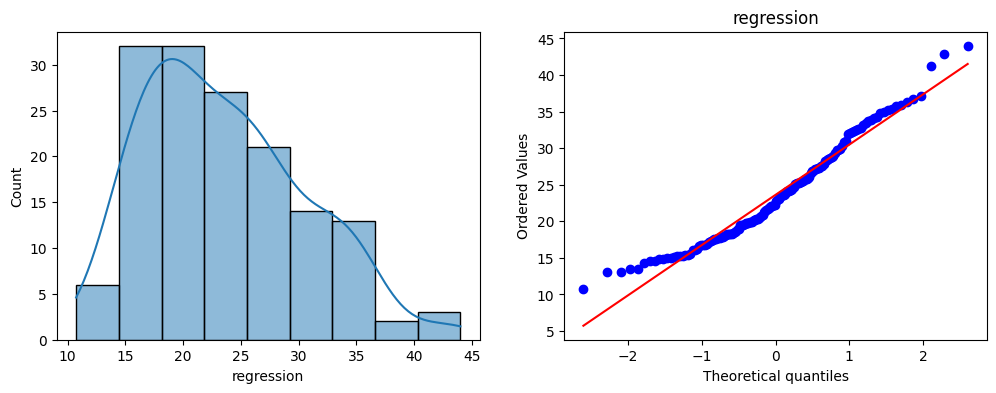

Columns:  sepal length (cm)_square
Skew: 0.5921749878500383
Kurtosis: -0.19073366550860094


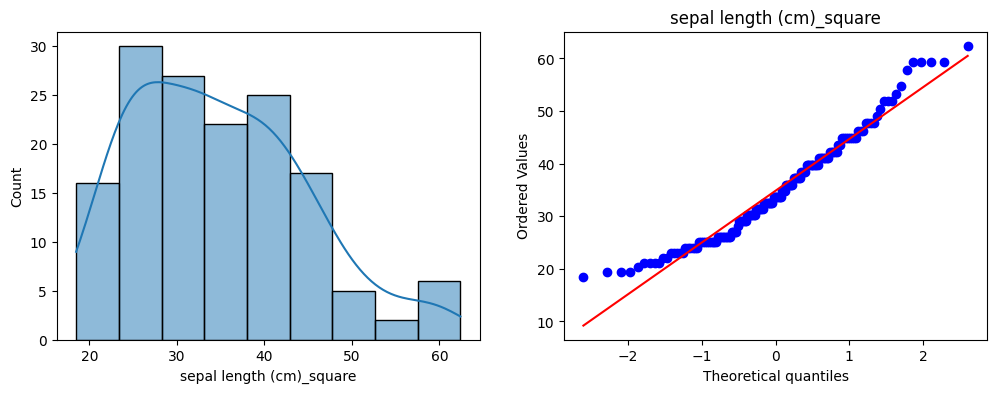

Columns:  sepal length (cm)_cube
Skew: 0.8845966400412075
Kurtosis: 0.40680136023003044


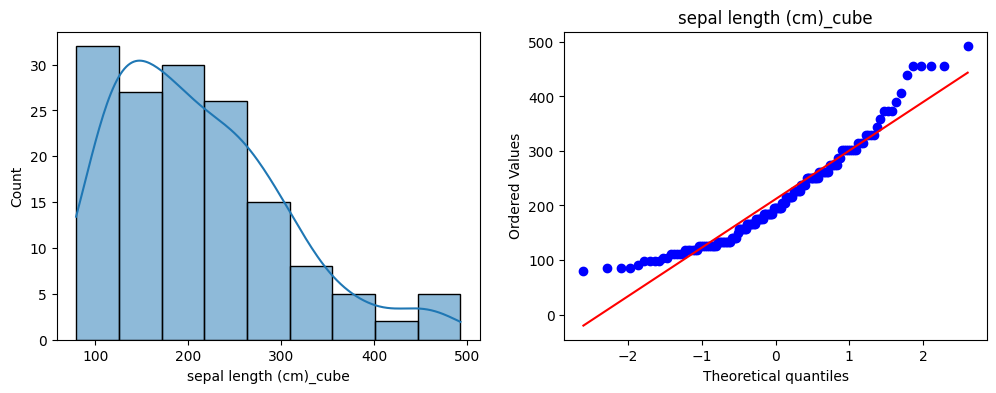

Columns:  sepal width (cm)_square
Skew: 0.7525215895139771
Kurtosis: 0.7968133646254816


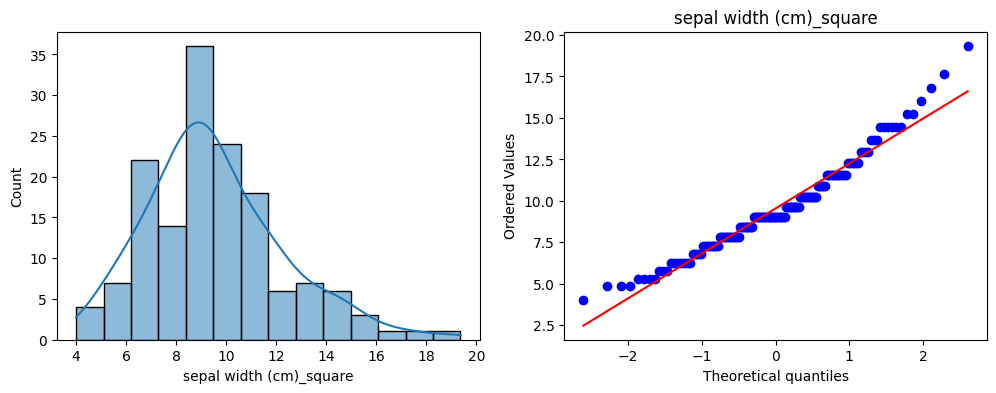

Columns:  sepal width (cm)_cube
Skew: 1.1951012007671398
Kurtosis: 1.961193733657649


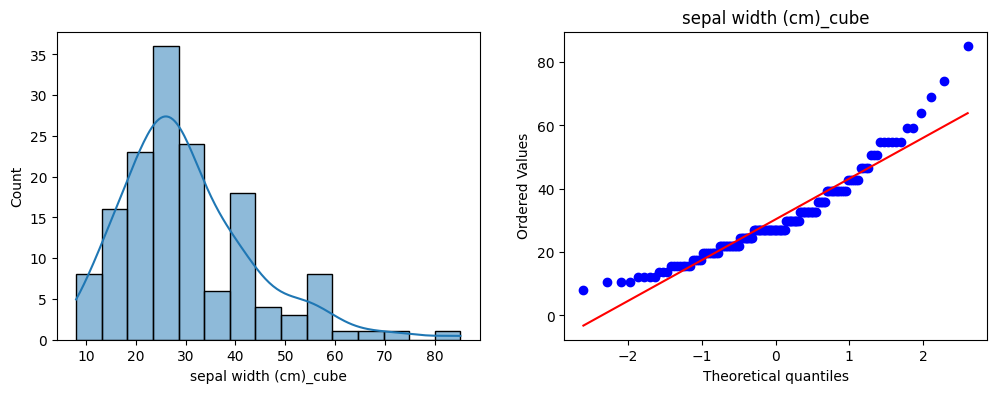

Columns:  petal length (cm)_cube
Skew: 0.7327175213943611
Kurtosis: -0.04770790157502791


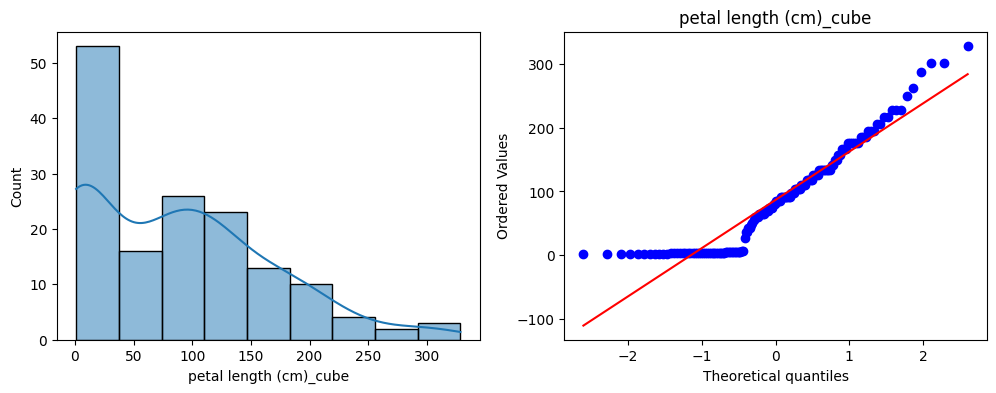

Columns:  petal length (cm)_log
Skew: -0.5818887365105445
Kurtosis: -1.3812470502687244


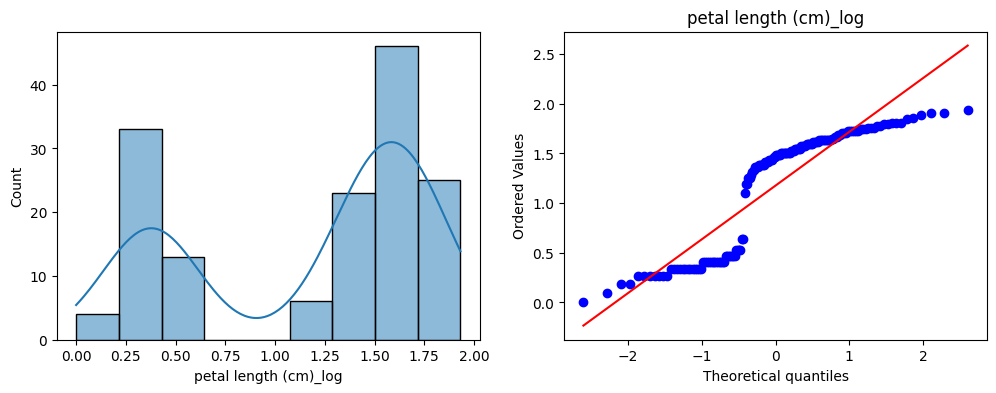

Columns:  petal width (cm)_square
Skew: 0.5805030449321547
Kurtosis: -0.7451811893796569


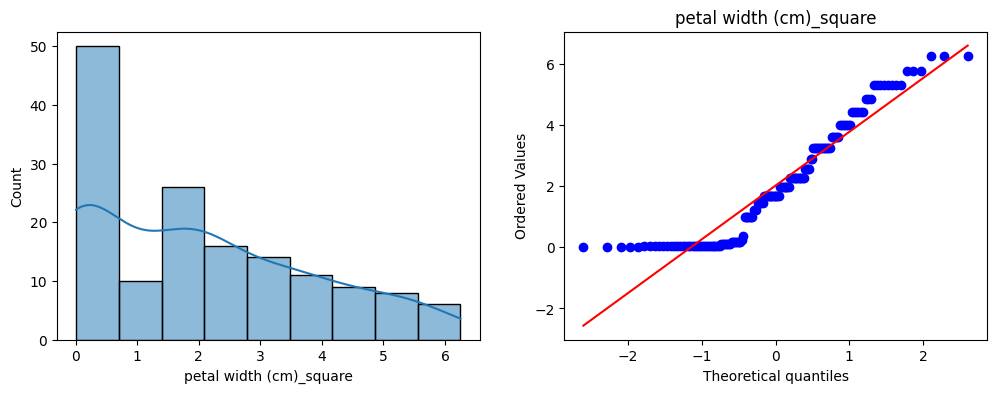

Columns:  petal width (cm)_cube
Skew: 1.1304638205974376
Kurtosis: 0.3062726080218061


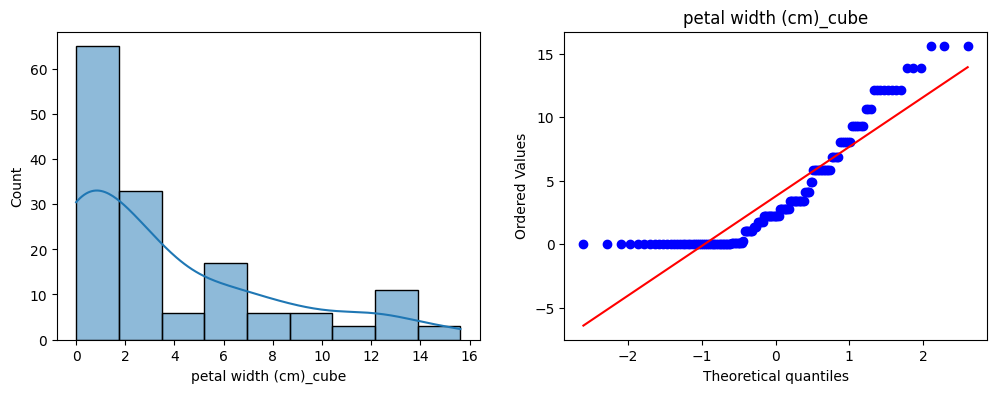

Columns:  petal width (cm)_log
Skew: -0.7379984955933059
Kurtosis: -1.0263509591070235


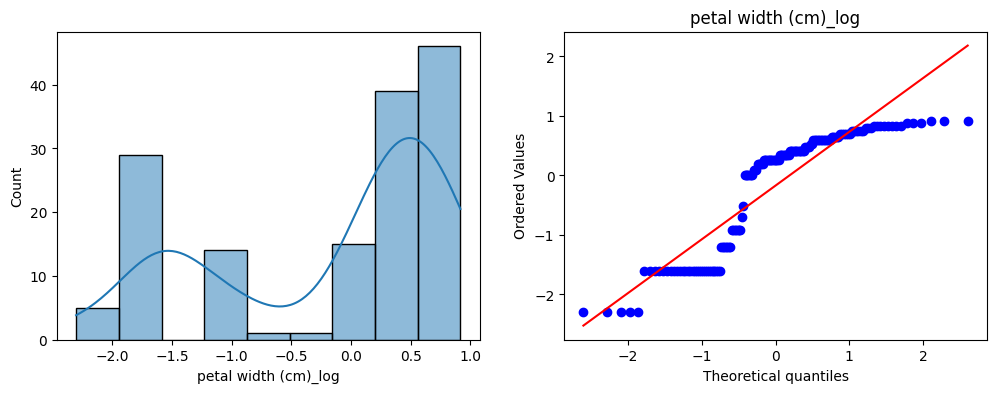

Columns:  regression_square
Skew: 1.1669522812304456
Kurtosis: 1.2059459669603507


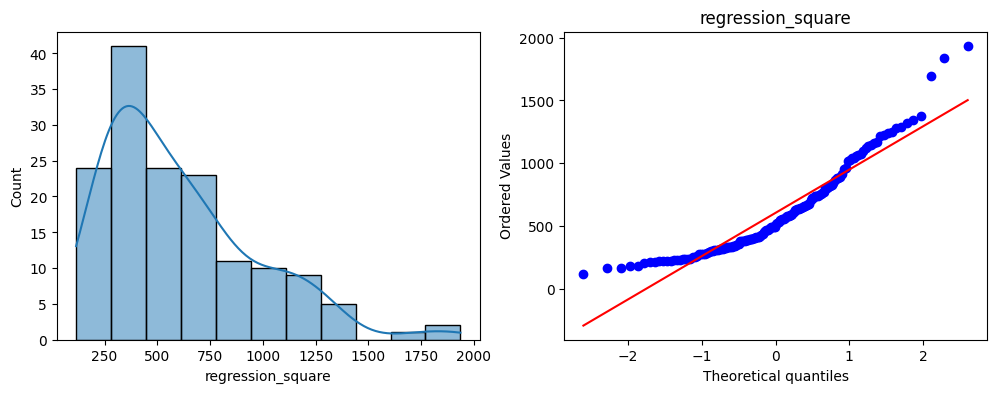

Columns:  regression_cube
Skew: 1.8207341574329237
Kurtosis: 4.013269621121232


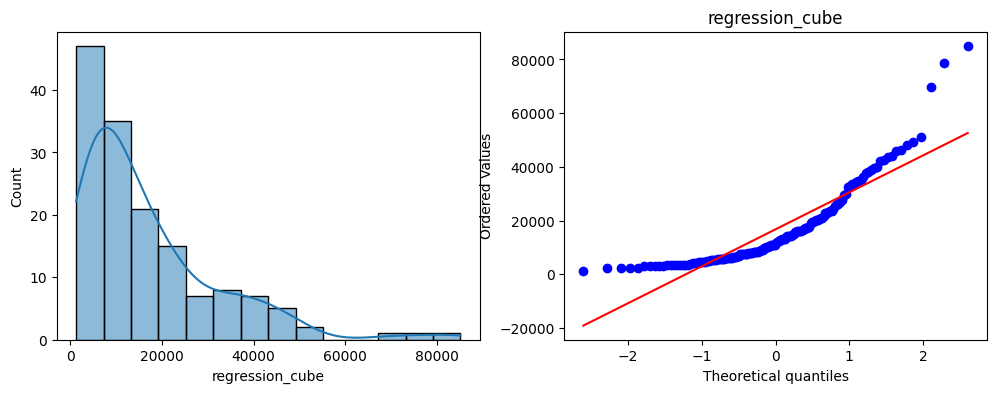

In [ ]:
for x in skew_columns:
    print("Columns: ", x)
    Diagnostic_plot(df= my_df, feature=x)

In [ ]:
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification,regression,sepal length (cm)_square,sepal length (cm)_cube,sepal length (cm)_sqrt,sepal length (cm)_log,sepal width (cm)_square,sepal width (cm)_cube,sepal width (cm)_sqrt,sepal width (cm)_log,petal length (cm)_square,petal length (cm)_cube,petal length (cm)_sqrt,petal length (cm)_log,petal width (cm)_square,petal width (cm)_cube,petal width (cm)_sqrt,petal width (cm)_log,regression_square,regression_cube,regression_sqrt,regression_log
0,5.1,3.5,1.4,0.2,0,18.13,26.01,132.651,2.258318,1.629241,12.25,42.875,1.870829,1.252763,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,328.6969,5959.274797,4.257934,2.897568
1,4.9,3.0,1.4,0.2,0,14.98,24.01,117.649,2.213594,1.589235,9.00,27.000,1.732051,1.098612,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,224.4004,3361.517992,3.870400,2.706716
2,4.7,3.2,1.3,0.2,0,15.30,22.09,103.823,2.167948,1.547563,10.24,32.768,1.788854,1.163151,1.69,2.197,1.140175,0.262364,0.04,0.008,0.447214,-1.609438,234.0900,3581.577000,3.911521,2.727853
3,4.6,3.1,1.5,0.2,0,14.56,21.16,97.336,2.144761,1.526056,9.61,29.791,1.760682,1.131402,2.25,3.375,1.224745,0.405465,0.04,0.008,0.447214,-1.609438,211.9936,3086.626816,3.815757,2.678278
4,5.0,3.6,1.4,0.2,0,18.28,25.00,125.000,2.236068,1.609438,12.96,46.656,1.897367,1.280934,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,334.1584,6108.415552,4.275512,2.905808


In [ ]:
from scipy.stats import skew, boxcox


def Find_lowest_skewness(df, columns):
    lowest_skewness = {}
    for x in columns:
        log = abs(skew(np.log(df[x])))
        reciprocal = abs(skew(1/(df[x])))
        sqrt = abs(skew((df[x])**(1/2)))
        exp = abs(skew(np.log(df[x])**(1/1.2)))
        # boxcox_trans, _ = boxcox(df[x]+1)
        # boxcox_skew = abs(skew(boxcox_trans))

        # Find the minimum skewness value and the corresponding transformation
        # min_skew = min(log, reciprocal, sqrt, exp, boxcox_skew)
        min_skew = min(log, reciprocal, sqrt, exp)

        if min_skew == log:
            transform = 'log'
        elif min_skew == reciprocal:
            transform = 'reciprocal'
        elif min_skew == sqrt:
            transform = 'sqrt'
        elif min_skew == exp:
            transform = 'exponential'
        elif min_skew == boxcox:
            transform = 'boxcox'
        else:
            transform = "delete"

        lowest_skewness[x] = (min_skew, transform)

    return lowest_skewness

In [ ]:
result = Find_lowest_skewness(df = my_df, columns= skew_columns)
for col, (skewness, transform) in result.items():
    print(f"{col} :- Lowest Skewness = {skewness} (Transform: {transform})")

regression :- Lowest Skewness = 0.0017269240313636176 (Transform: exponential)
sepal length (cm)_square :- Lowest Skewness = 0.01822941728131654 (Transform: exponential)
sepal length (cm)_cube :- Lowest Skewness = 0.018229417281322633 (Transform: exponential)
sepal width (cm)_square :- Lowest Skewness = 0.12327691873138602 (Transform: log)
sepal width (cm)_cube :- Lowest Skewness = 0.12327691873138462 (Transform: log)
petal length (cm)_cube :- Lowest Skewness = 0.060736791747159874 (Transform: sqrt)
petal length (cm)_log :- Lowest Skewness = nan (Transform: delete)
petal width (cm)_square :- Lowest Skewness = 0.10193420656560036 (Transform: sqrt)
petal width (cm)_cube :- Lowest Skewness = 0.24732631852690892 (Transform: sqrt)
petal width (cm)_log :- Lowest Skewness = nan (Transform: delete)
regression_square :- Lowest Skewness = 0.0017269240313663855 (Transform: exponential)
regression_cube :- Lowest Skewness = 0.0017269240313709676 (Transform: exponential)


In [ ]:
columns_to_drop = ['sepal width (cm)_square', 'sepal width (cm)_cube', 'petal length (cm)_log', 'petal width (cm)_square', 'petal width (cm)_cube', 'petal width (cm)_log']

# Drop the specified columns
my_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Exponential Transformation
my_df['regression'] = my_df['regression']**(1/1.2)
my_df['regression_cube'] = my_df['regression_cube']**(1/1.2)
my_df['regression_square'] = my_df['regression_square']**(1/1.2)
my_df['sepal length (cm)_square'] = my_df['sepal length (cm)_square']**(1/1.2)
my_df['sepal length (cm)_cube'] = my_df['sepal length (cm)_cube']**(1/1.2)

# Sqrt Transformation
my_df['petal length (cm)_cube'] = my_df['petal length (cm)_cube']**(1/2)

In [ ]:
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification,regression,sepal length (cm)_square,sepal length (cm)_cube,sepal length (cm)_sqrt,sepal length (cm)_log,sepal width (cm)_square,sepal width (cm)_cube,sepal width (cm)_sqrt,sepal width (cm)_log,petal length (cm)_square,petal length (cm)_cube,petal length (cm)_sqrt,petal length (cm)_log,petal width (cm)_square,petal width (cm)_cube,petal width (cm)_sqrt,petal width (cm)_log,regression_square,regression_cube,regression_sqrt,regression_log
0,5.1,3.5,1.4,0.2,0,18.13,26.01,132.651,2.258318,1.629241,12.25,42.875,1.870829,1.252763,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,328.6969,5959.274797,4.257934,2.897568
1,4.9,3.0,1.4,0.2,0,14.98,24.01,117.649,2.213594,1.589235,9.00,27.000,1.732051,1.098612,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,224.4004,3361.517992,3.870400,2.706716
2,4.7,3.2,1.3,0.2,0,15.30,22.09,103.823,2.167948,1.547563,10.24,32.768,1.788854,1.163151,1.69,2.197,1.140175,0.262364,0.04,0.008,0.447214,-1.609438,234.0900,3581.577000,3.911521,2.727853
3,4.6,3.1,1.5,0.2,0,14.56,21.16,97.336,2.144761,1.526056,9.61,29.791,1.760682,1.131402,2.25,3.375,1.224745,0.405465,0.04,0.008,0.447214,-1.609438,211.9936,3086.626816,3.815757,2.678278
4,5.0,3.6,1.4,0.2,0,18.28,25.00,125.000,2.236068,1.609438,12.96,46.656,1.897367,1.280934,1.96,2.744,1.183216,0.336472,0.04,0.008,0.447214,-1.609438,334.1584,6108.415552,4.275512,2.905808


In [ ]:
# logarithmic transformation
my_df['regression_cube_log'] = np.log(my_df['regression_cube'])

# reciprocal transformation
my_df['regression_cube_reciprocal'] = 1/(my_df['regression_cube']+ 1)

# square root transformation
my_df['regression_cube_sqrt'] = (my_df['regression_cube'])**(1/2)

# exponential transformation (more general, you can use any exponent)
my_df['regression_cube_exp'] = my_df['regression_cube']**(1/1.2)

# boxcox transformation
import scipy.stats as stat
my_df['regression_cube_boxcox'], _ = stat.boxcox(my_df['regression_cube']+1)